In [86]:
#Importing necesary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [87]:
#Splitting the data as test and train data mnist database
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

(28, 28)
5


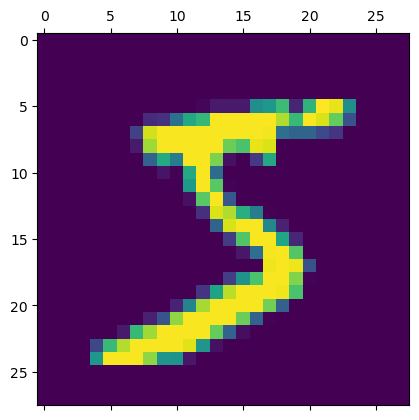

In [69]:
#Analyzing the data(Example)
print(X_train[0].shape)
plt.matshow(X_train[0])
print(y_train[0])
X_train[0]
#Scaling
X_train=X_train/255
X_test=X_test/255

In [70]:
#Reshaping the data (1D array)
X_train_fl=X_train.reshape(len(X_train),28*28)
X_test_fl=X_test.reshape(len(X_test),28*28)
print(X_train_fl.shape)
X_train_fl[0]

(60000, 784)


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [89]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_fl,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8780 - loss: 0.4355
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9646 - loss: 0.1211
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9754 - loss: 0.0809
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9820 - loss: 0.0582
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9875 - loss: 0.0435


In [90]:
#Evaluate
model.evaluate(X_test_fl,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9740 - loss: 0.0899


[0.078944131731987, 0.9768000245094299]

In [91]:
y_predict=model.predict(X_test_fl)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


[3.2270145e-02 5.3835203e-07 6.4941987e-02 9.6831220e-01 3.8303123e-03
 1.4528576e-01 2.2592164e-06 9.9976164e-01 1.2383759e-01 7.2483420e-01]
---------------------
7


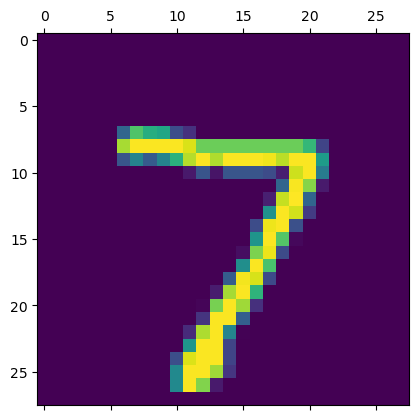

In [74]:
#For a sample
plt.matshow(X_test[0])
print(y_predict[0]) #scores
print('---------------------')
print(np.argmax(y_predict[0]))

[2.5613002e-07 3.6587966e-08 2.3935976e-05 1.5094504e-07 9.9734676e-01
 4.0758809e-07 7.8886598e-07 4.3973767e-05 7.2081247e-07 2.5829209e-03]
---------------------
4


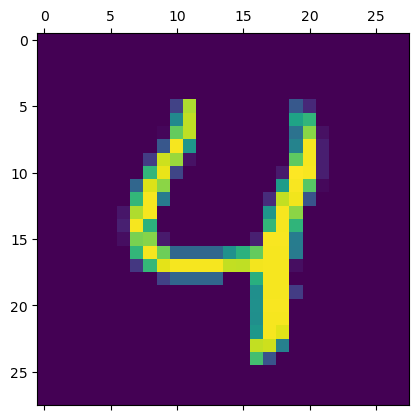

In [92]:
plt.matshow(X_test[4])
print(y_predict[4])
print('---------------------')
print(np.argmax(y_predict[4]))

In [93]:
y_predicted_labels=[np.argmax(i) for i in y_predict]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

Text(50.722222222222214, 0.5, 'Truth')

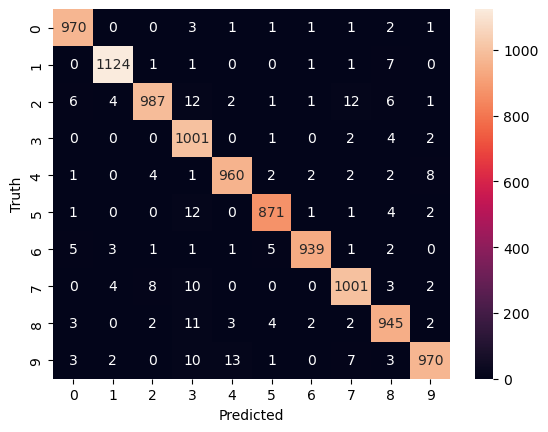

In [94]:
#Confusion Matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')